## Final Project

Project ini menggunakan dataset loan default. Tujuan dari project ini yaitu untuk membuat model machine learning untuk memprediksi apakah seorang pemohon pinjaman akan default atau tidak. Data yang digunakan diambil dari https://www.kaggle.com/datasets/yasserh/loan-default-dataset.

### Import Packages dan Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Loan_Default.csv")

### Exploratory Data Analysis

#### Dataset Explanation

In [4]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [5]:
df.shape

(148670, 34)

Dataset ini memiliki 34 kolom dan 148670 baris. Berikut ini merupakan penjelasan dari tiap kolom yang ada pada dataset ini.
- ID : tanda unik yang mengidentifikasi tiap pemohon 
- year : tahun pinjaman diberikan
- loan_limit : jumlah uang maksimal yang bisa dipinjam pemohon
- Gender : jenis kelamin pemohon
- approv_in_adv : apakah permohonan peminjam disetujui di awal (tanpa screening) atau tidak
- loan_type : Jenis pinjaman
- loan_purpose : alasan peminjam ingin meminjam uang
- Credit_Worthiness : Seberapa layak peminjam untuk menerima pinjaman baru,
- open_credit : pinjaman yang telah disetujui sebelumnya antara pemberi pinjaman dan peminjam. Ini memungkinkan peminjam untuk melakukan penarikan berulang hingga batas tertentu.
- business_or_commercial : Jenis penggunaan pinjaman.
- loan_amount : Jumlah pinjaman secara eksak.
- rate_of_interest : Jumlah yang dibebankan pemberi pinjaman kepada peminjam dan merupakan persentase dari pokok—jumlah yang dipinjamkan
- Interest_rate_spread : Selisih antara tingkat bunga yang dibayarkan lembaga keuangan kepada deposan dan tingkat bunga yang diterimanya dari pinjaman
- Upfront_charges : Biaya yang dibayarkan kepada pemberi pinjaman oleh peminjam sebagai pertimbangan untuk membuat pinjaman baru
- term : Jangka waktu pelunasan pinjaman
- Neg_ammortization : Mengacu pada situasi ketika peminjam pinjaman melakukan pembayaran kurang dari angsuran standar yang ditetapkan oleh bank
- Interest_only : jumlah bunga saja tanpa prinsip
- lump_sum_payment : Jumlah uang yang dibayarkan dalam satu kali pembayaran, bukan secara mencicil
- property_value : Nilai sekarang dari manfaat masa depan yang timbul dari kepemilikan properti
- construction_type : Jenis konstruksi agunan
- occupancy_type : klasifikasi mengacu pada pengkategorian struktur berdasarkan penggunaannya
- Secured_by : Jenis Jaminan
- total_units : jumlah unit
- income :mengacu pada jumlah uang, properti, dan transfer nilai lainnya yang diterima selama periode waktu tertentu
- credit_type : jenis kredit
- Credit_Score : ukuran kelayakan kredit
- co-applicant_credit_type : orang tambahan yang terlibat dalam proses aplikasi pinjaman. Baik pemohon dan pemohon bersama mengajukan dan menandatangani pinjaman
- age : umur pelamar
- submission_of_application : Pastikan aplikasi lengkap atau tidak
- LTV : nilai waktu hidup (LTV) adalah perkiraan laba bersih
- Region : tempat pemohon
- Security_Type :Jenis Jaminan
- Status : Apakah nasabah default atau tidak
- dtir1 : rasio utang terhadap pendapatan

Kolom `Status` menjadi kolom tujuan yang akan diprediksi (label).

#### Checking Data Types and Missing Values

Untuk langkah pertama, kita perlu mengecek apakah tiap kolom pada dataset memiliki tipe data yang benar, dan mengecek nilai yang dimiliki oleh tiap kolomnya.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Terdapat kejanggalan pada tipe data kolom `total_units` dan `age` yang memiliki tipe data object, padahal total unit dan usia seharusnya bertipe data integer. Akan dilakukan pengecekan terhadap kolom-kolom tersebut.

In [8]:
df["total_units"].value_counts()

1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64

In [9]:
df["age"].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

Ternyata, kolom `total_units` dikelompokkan berdasarkan jumlah unitnya dan kolom `age` dikelompokkan berdasarkan range usia tertentu sehingga kedua kolom ini memiliki tipe data object. Nilai-nilai pada `total_units` akan diubah menjadi integer.

In [10]:
def tunit(x):
    if x=='1U':
        x=1
        return x
    elif x=='2U':
        x=2
        return x
    elif x=='3U':
        x=3
        return x
    else:
        x=4
        return x

In [11]:
df["total_units"] = df.apply(lambda x: tunit(x.total_units), axis = 1)

Kolom gender memiliki nilai 'Sex Not Available' yang sama dengan nilai NaN, maka dari itu nilai 'Sex Not Available akan diganti dengan NaN'

In [12]:
df["Gender"].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [13]:
def gender(x):
    if x=="Sex Not Available":
        x=np.nan
        return x
    else:
        return x

In [14]:
df["Gender"] = df.apply(lambda x: gender(x.Gender), axis = 1)

#### Handle Missing Values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     111011 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Dataset df memiliki banyak kolom yang memiliki nilai kosong (missing value), terutama di kolom `Gender`, `rate_of_interest`, `Interest_rate_spread`, dan juga `Upfront_charges`. Akan dilihat persebaran missing value ini berdasarkan `Status`nya.

In [16]:
df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [17]:
df.Gender.isnull().groupby([df['Status']]).sum().astype(int)

Status
0    26892
1    10767
Name: Gender, dtype: int64

In [18]:
df.rate_of_interest.isnull().groupby([df['Status']]).sum().astype(int)

Status
0        0
1    36439
Name: rate_of_interest, dtype: int64

In [19]:
df.Interest_rate_spread.isnull().groupby([df['Status']]).sum().astype(int)

Status
0        0
1    36639
Name: Interest_rate_spread, dtype: int64

In [20]:
df.Upfront_charges.isnull().groupby([df['Status']]).sum().astype(int)

Status
0     3156
1    36486
Name: Upfront_charges, dtype: int64

Kolom `rate_of_interest`, `Interest_rate_spread`, dan `Upfront_charges` akan dihapus karena nilai kosong pada Status 1-nya sangat banyak. Begitu pula dengan kolom `gender` akan dihapus.

In [21]:
df.drop(['rate_of_interest','Interest_rate_spread','Upfront_charges'], axis = 'columns', inplace = True)

In [22]:
df.drop(['Gender'], axis = 'columns', inplace = True)

Kolom `ID` tidak berpengaruh terhadap `Status`, begitu pula dengan kolom `year` karena hanya memiliki satu nilai yaitu 2019. Maka dari itu, kolom `ID` dan `year` akan dihapus.

In [23]:
df.drop(['ID','year'], axis = 'columns', inplace = True)

Selanjutnya, data yang kosong akan diganti dengan mean/modus dari tiap kolomnya.

In [24]:
data = df.copy()

In [25]:
df['loan_limit'] = df['loan_limit'].fillna(df['loan_limit'].mode())
df['approv_in_adv'] = df['approv_in_adv'].fillna(df['approv_in_adv'].mode())
df['loan_purpose'] = df['loan_purpose'].fillna(df['loan_purpose'].mode())
df['term'] = df['term'].fillna(df['term'].mean())
df['Neg_ammortization'] = df['Neg_ammortization'].fillna(df['Neg_ammortization'].mode())
df['property_value'] = df['property_value'].fillna(df['property_value'].mean())
df['income'] = df['income'].fillna(df['income'].mean())
df['LTV'] = df['LTV'].fillna(df['LTV'].mean())
df['dtir1'] = df['dtir1'].fillna(df['dtir1'].mean())

#### Data Visualization

Sebelum melakukan feature selection, kita perlu terlebih dahulu memahami tiap kolom untuk menentukan kolom mana yang akan digunakan sebagai prediktor. Berikut merupakan heatmap yang menunjukkan korelasi antar tiap kolom numerik.

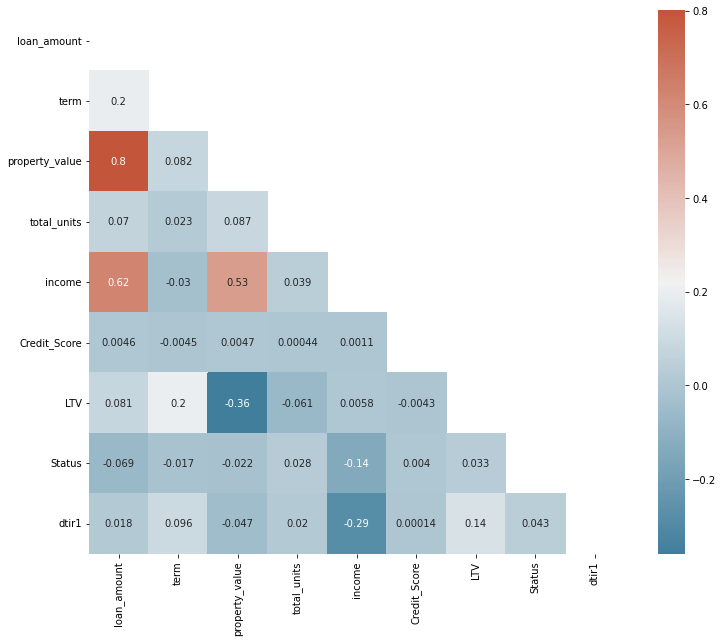

In [26]:
corr = df.corr('spearman')
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Dari heatmap di atas, bisa kita simpulkan bahwa `property_value` dan `loan_amount` memiliki korelasi yang tinggi. Sehingga jika salah satu dipilih menjadi prediktor, maka yang lainnya harus diserakan. Begitu pula kolom `income` dengan `loan_amount` dan kolom `income` dengan `property_value` memiliki korelasi yang cukup tinggi. Semakin tinggi property value-nya, semakin tinggi income dan juga loan amountnya, begitu pula sebaliknya.
Berikutnya akan dilihat hubungan antar kolom numerik dengan kolom `Status` dengan menggunakan scatterplot

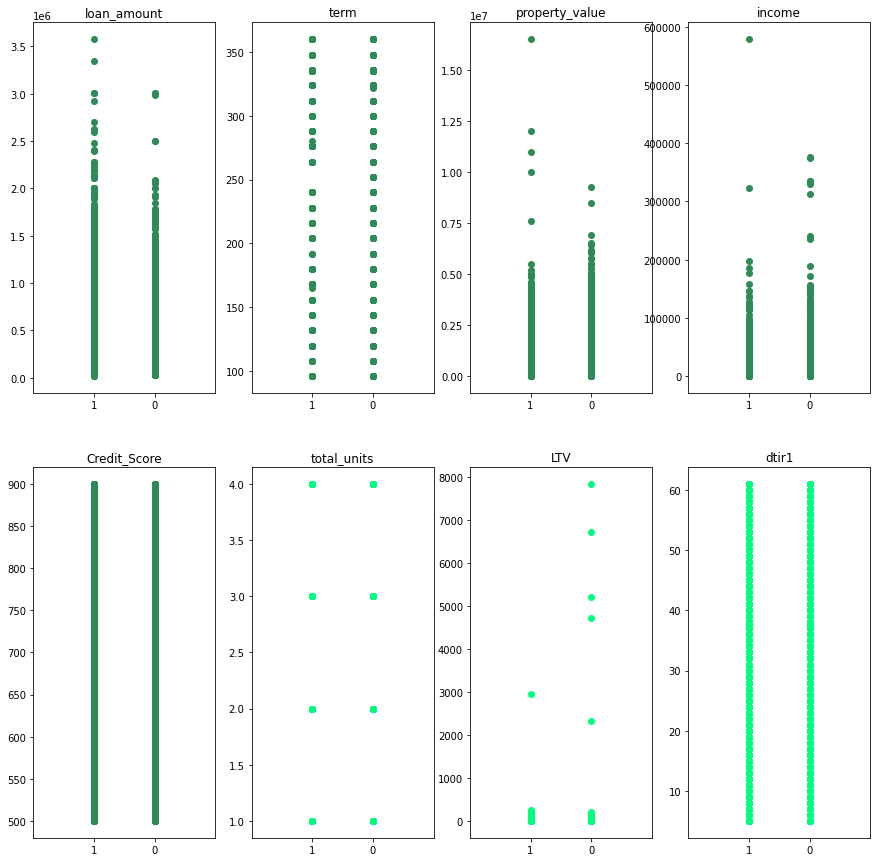

In [27]:
fig, axs = plt.subplots(2, 4,figsize=(15,15))

axs[0, 0].scatter(df["Status"].astype(str), df["loan_amount"], color='seagreen')
axs[0, 0].margins(x=1)
axs[0, 0].set_title('loan_amount')

axs[0, 1].scatter(df["Status"].astype(str), df["term"], color='seagreen')
axs[0, 1].margins(x=1)
axs[0, 1].set_title('term')

axs[0, 2].scatter(df["Status"].astype(str), df["property_value"], color='seagreen')
axs[0, 2].margins(x=1)
axs[0, 2].set_title('property_value')

axs[0, 3].scatter(df["Status"].astype(str), df["income"], color='seagreen')
axs[0, 3].margins(x=1)
axs[0, 3].set_title('income')

axs[1, 0].scatter(df["Status"].astype(str), df["Credit_Score"], color='seagreen')
axs[1, 0].margins(x=1)
axs[1, 0].set_title('Credit_Score')

axs[1, 1].scatter(df["Status"].astype(str), df["total_units"], color='springgreen')
axs[1, 1].margins(x=1)
axs[1, 1].set_title('total_units')

axs[1, 2].scatter(df["Status"].astype(str), df["LTV"], color='springgreen')
axs[1, 2].margins(x=1)
axs[1, 2].set_title('LTV')

axs[1, 3].scatter(df["Status"].astype(str), df["dtir1"], color='springgreen')
axs[1, 3].margins(x=1)
axs[1, 3].set_title('dtir1')

plt.show()

Dari visualisasi di atas, ternyata peminjam yang default ternyata property_value dan incomenya memiliki rata-rata yang lebih tinggi dibandingkan dengan yang tidak default. Hal ini dikarenakan property_value dan income memiliki korelasi yang cukup tinggi dengan loan_amount, sehingga semakin tinggi property_value dan income-nya, semakin tinggi pula loan_amount-nya.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b1f94c990>,
      dtype=object)

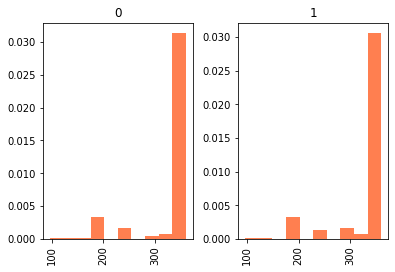

In [29]:
df['term'].hist(by=df['Status'],density=True, color='coral')

Pada visualisasi di atas, terlihat bahwa baik di status 0 maupun 1, semakin panjang `term`-nya, semakin banyak aplikasi pinjamannya. Hal ini mungkin dikarenakan jangka waktu pinjaman yang panjang membuat pembayaran tiap bulannya lebih rendah.

In [30]:
df.groupby([('Status')])['total_units'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,1.018977,0.187050,1.0,1.0,1.0,1.0,4.0
1,36639.0,1.029941,0.229882,1.0,1.0,1.0,1.0,4.0


In [31]:
df.groupby([('Status')])['LTV'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,72.064769,41.768526,2.072943,59.970817,74.504405,85.201149,7831.25
1,36639.0,74.830853,21.984413,0.967478,72.746457,72.746457,82.335907,2956.25


In [32]:
df.groupby([('Status')])['Credit_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,699.523793,115.674510,500.0,599.0,699.0,800.0,900.0
1,36639.0,700.600344,116.487189,500.0,599.5,700.0,803.0,900.0


In [33]:
df.groupby([('Status')])['dtir1'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,112031.0,37.394622,9.671765,5.0,32.000000,37.732932,44.0,61.0
1,36639.0,38.767383,9.517616,5.0,37.732932,37.732932,43.0,61.0


Kolom `LTV` dan `total_units` juga tidak begitu berpengaruh terhadap `Status` sehingga kolom tersebut tidak akan dipakai sebagai prediktor. Terakhir, kolom `term`, `Credit_Score` dan `dtir1` memiliki rata-rata sedikit lebih tinggi pada pinjaman yang default. Berikut ditampilkan histogram `Credit_Score` dan `dtir1` berdasarkan statusnya.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b1f849e10>,
      dtype=object)

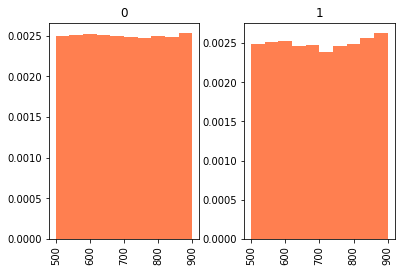

In [34]:
df['Credit_Score'].hist(by=df['Status'],density=True, color='coral')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b1f6e4110>,
      dtype=object)

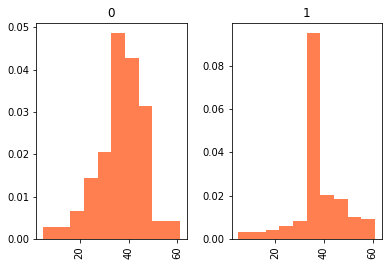

In [35]:
df['dtir1'].hist(by=df['Status'],density=True, color='coral')

Pada histogram di atas dapat dilihat bahwa pada `credit_score` pada status 1 cenderung naik seiring bertambahnya score, padahal seharusnya `credit_score` menunjukkan kredibilitas peminjam. Pada kolom `dtr1`, range 40-60 pada status 0 lebih banyak presentasenya dibandingkan dengan status 1. Yang berarti semakin tinggi `dtir`, kemungkinan peminjam untuk tidak default lebih tinggi.

In [36]:
df.drop(['LTV','total_units'], axis = 'columns', inplace = True)

Selanjutnya akan dipilih kolom-kolom categorical yang akan menjadi feature dengan menggunakan barplot.

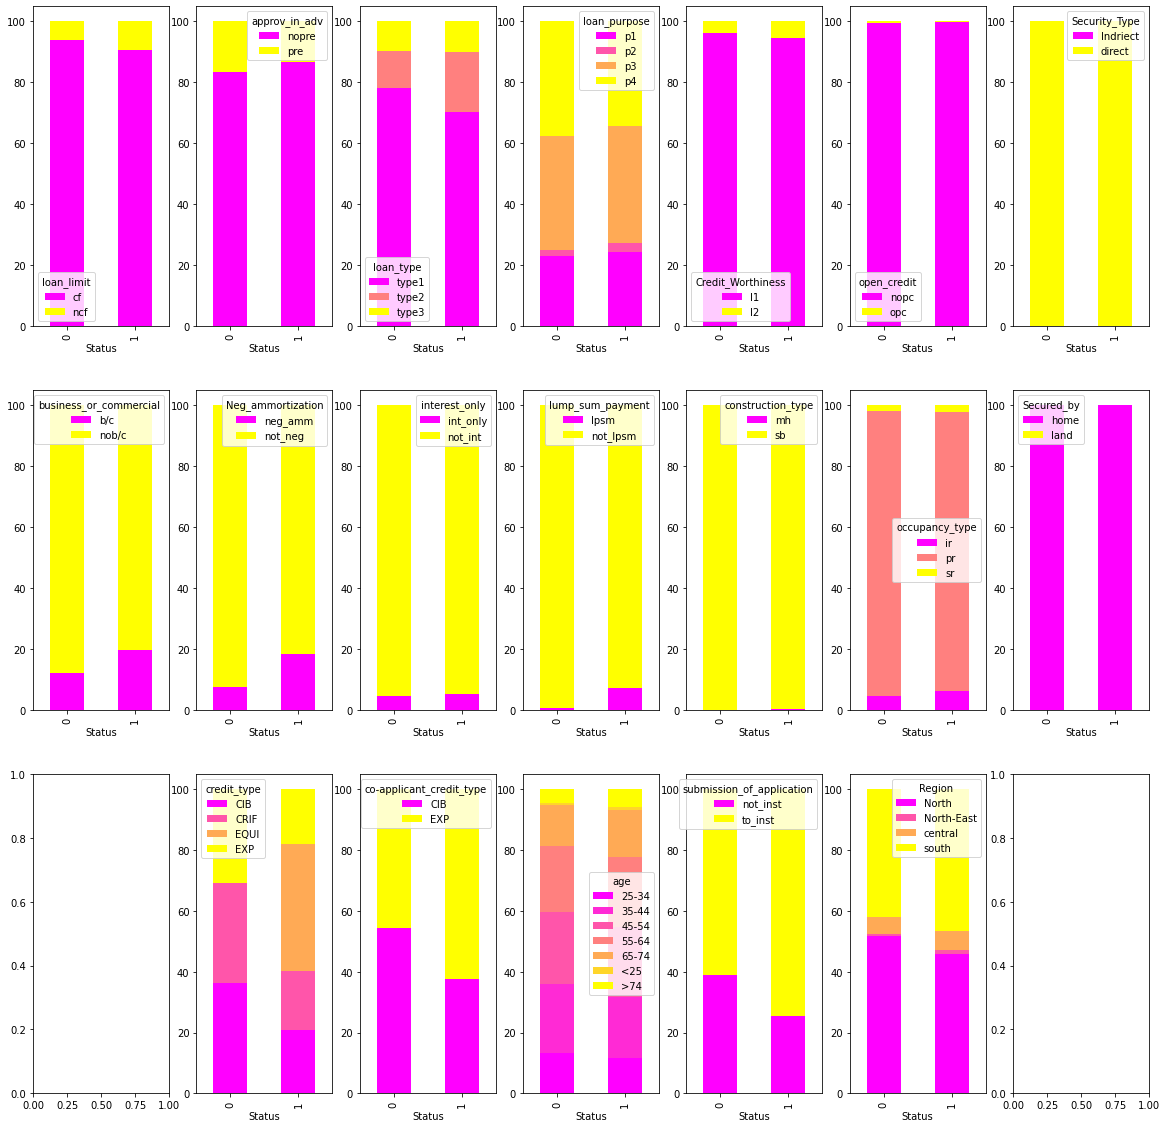

In [37]:
fig, axs = plt.subplots(3,7,figsize=(20,20))


pd.crosstab(df['Status'], df['loan_limit']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][0],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['approv_in_adv']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][1],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['loan_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][2],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['loan_purpose']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][3],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['Credit_Worthiness']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][4],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['open_credit']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][5],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['Security_Type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[0][6],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['business_or_commercial']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][0],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['Neg_ammortization']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][1],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['interest_only']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][2],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['lump_sum_payment']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][3],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['construction_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][4],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['occupancy_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][5],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['Secured_by']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[1][6],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['credit_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][1],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['co-applicant_credit_type']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][2],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['age']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][3],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['submission_of_application']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][4],kind = 'bar', stacked = True, colormap='spring')
pd.crosstab(df['Status'], df['Region']).apply(lambda x: x*100/x.sum(), axis = 1).plot(ax = axs[2][5],kind = 'bar', stacked = True, colormap='spring')


Pada barplot di atas dapat dilihat dengan jelas bahwa kolom `open_credit`, `interest_only`, `construction_type`, `occupancy_type`, `Secured_by`, `credit_type`, `co-applicant_credit_type`, `region`, dan `Security_Type` tidak memiliki perbedaan jumlah yang signifikan antara pinjaman yang default dan tidak. Maka dari itu, kolom-kolom tersebut akan dihapus dan tidak digunakan sebagai prediktor. 

In [38]:
df.drop(['open_credit','interest_only','construction_type','occupancy_type','Secured_by','credit_type','Region','Security_Type','co-applicant_credit_type'], axis = 'columns', inplace = True)

In [39]:
pd.crosstab(df['Status'], df['age']).apply(lambda x: x*100/x.sum(), axis = 1)

age,25-34,35-44,45-54,55-64,65-74,<25,>74
Status,,,,,,,
0,13.294535,22.769591,23.539020,21.522614,13.543573,0.847980,4.482688
1,11.657839,20.058179,22.912264,23.112599,15.288564,1.062049,5.908505


Pada kolom `age` dapat dilihat bahwa peminjam dengan usia dibawah 54 cenderung lebih banyak yang tidak default dibandingkan dengan peminjam diatas usia 54.

In [40]:
pd.crosstab(df['Status'], df['loan_type']).apply(lambda x: x*100/x.sum(), axis = 1)

loan_type,type1,type2,type3
Status,,,
0,78.012336,12.130571,9.857093
1,70.348536,19.574770,10.076694


Dapat dilihat bahwa peminjam yang diapprove memiliki persentase yang lebih tinggi pada tipe 2 dan 3 nya dibandingkan dengan yang tidak diapprove. Pada model ini, kolom `age` dan `loan_type` akan digunakan sebagai prediktor. Kolom lainnya yang tidak digunakan akan dihapus.

In [41]:
df2 = df.copy()

In [42]:
df2.drop(['lump_sum_payment','Neg_ammortization','business_or_commercial','loan_purpose','approv_in_adv','loan_limit','Credit_Worthiness','submission_of_application'], axis = 'columns', inplace = True)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_type       148670 non-null  object 
 1   loan_amount     148670 non-null  int64  
 2   term            148670 non-null  float64
 3   property_value  148670 non-null  float64
 4   income          148670 non-null  float64
 5   Credit_Score    148670 non-null  int64  
 6   age             148470 non-null  object 
 7   Status          148670 non-null  int64  
 8   dtir1           148670 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 10.2+ MB


Feature yang digunakan adalah `loan_type`, `loan_amount`, `term`, `property_value`, `income`, `Credit_Score`, `age`, dan `dtir1`.

In [44]:
df2['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

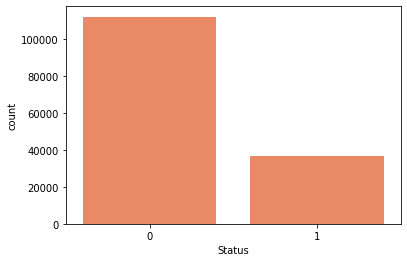

In [45]:
sns.countplot(data = df2, x = 'Status', color='coral')

Kolom `status` memiliki data yang tidak seimbang. Oleh karena itu, akan dilakukan resampling terlebih dahulu.

### Model Building

#### Resampling & One Hot Encoding

Sebelum melakukan one-hot encoding, akn dilakukan resampling data terlebih dahulu karena terdapat perbedaan banyaknya data yang disetujui dan ditolak pada kolom `Status`.

In [46]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df2[(df2['Status']==0)] 
df_minority = df2[(df2['Status']==1)] 
# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples=36639, # to match minority class
                                 random_state=42)  # reproducible results
# Combine downsampled majority class with minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [47]:
df_downsampled['Status'].value_counts()

0    36639
1    36639
Name: Status, dtype: int64

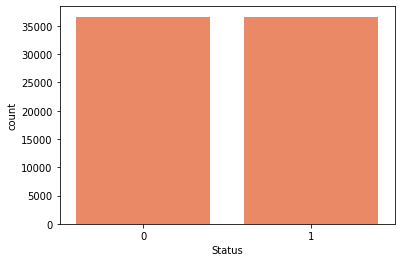

In [48]:
sns.countplot(data=df_downsampled,x='Status',color='coral')

In [49]:
df2 = pd.get_dummies(df_downsampled)
df2.head()

,loan_amount,term,property_value,income,Credit_Score,Status,dtir1,loan_type_type1,loan_type_type2,loan_type_type3,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
20907,256500,360.0,268000.0,6957.338876,565,0,37.732932,0,1,0,0,0,0,0,0,1,0
1156,216500,240.0,338000.0,7500.000000,619,0,9.000000,1,0,0,0,1,0,0,0,0,0
137562,146500,360.0,178000.0,4200.000000,603,0,48.000000,0,1,0,0,0,1,0,0,0,0
146313,586500,360.0,728000.0,6780.000000,530,0,55.000000,0,1,0,0,0,0,1,0,0,0
101844,166500,360.0,178000.0,4500.000000,725,0,36.000000,1,0,0,0,0,1,0,0,0,0


In [50]:
df2['Status'].value_counts()

0    36639
1    36639
Name: Status, dtype: int64

#### Random Forest

In [51]:
X = df2.loc[:, df2.columns != 'Status']
y = df2["Status"]

In [52]:
# Train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

### Improving Model

Pada tahap ini, akan digunakan dua cara untuk meningkatkan akurasi model, yaitu dengan cara menambahkan feature yang digunakan sebagai prediktor dan dengan hyperparameter tuning.

#### Adding feature

In [54]:
df3 = df.copy()

In [55]:
df3.drop(['lump_sum_payment','Neg_ammortization','business_or_commercial','approv_in_adv','loan_limit','Credit_Worthiness','submission_of_application'], axis = 'columns', inplace = True)

In [56]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df3[(df3['Status']==0)] 
df_minority = df3[(df3['Status']==1)] 
# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples=36639, # to match minority class
                                 random_state=42)  # reproducible results
# Combine downsampled majority class with minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [57]:
df3 = pd.get_dummies(df_downsampled)
df3.head()

,loan_amount,term,property_value,income,Credit_Score,Status,dtir1,loan_type_type1,loan_type_type2,loan_type_type3,...,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
20907,256500,360.0,268000.0,6957.338876,565,0,37.732932,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1156,216500,240.0,338000.0,7500.000000,619,0,9.000000,1,0,0,...,0,0,0,0,1,0,0,0,0,0
137562,146500,360.0,178000.0,4200.000000,603,0,48.000000,0,1,0,...,0,1,0,0,0,1,0,0,0,0
146313,586500,360.0,728000.0,6780.000000,530,0,55.000000,0,1,0,...,0,1,0,0,0,0,1,0,0,0
101844,166500,360.0,178000.0,4500.000000,725,0,36.000000,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
X = df3.loc[:, df3.columns != 'Status']
y = df3["Status"]

In [61]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [62]:
from sklearn.ensemble import RandomForestClassifier

improve_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

improve_rf.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

#### Hyperparameter Tuning

In [63]:
#Hyperparameter Tuning
#Mendefinisikan RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [64]:
#Mendefinisikan hyperparameter
params = {
    'max_depth': list(range(2,20)),
    'min_samples_leaf': list(range(1,50)),
    'n_estimators': list(range(100,200,10))
}

In [65]:
#random search untuk mencari hyperparameter terbaik
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           n_iter=100,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

random_search.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'n_estimators': [100, 110, 120, 130,
                                                         140, 150

In [66]:
random_search.best_score_

0.7808161006460081

In [67]:
#train model dengan menggunakan hyperparameter hasil random search 
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=2, n_estimators=120,
                       n_jobs=-1, random_state=42)

In [68]:
#model awal
y_classifier_rf = classifier_rf.predict(X_test)
#setelah menambah feature
y_improve_rf = improve_rf.predict(X_test2)
#setelah hyperparameter tuning
y_rf = rf_best.predict(X_test)

#### Model Evaluation

In [69]:
#Evaluasi model menggunakan AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_classifier_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test2, y_improve_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7665100805065003
0.740794243423467
0.7880235115075124


In [70]:
#Evaluasi Model menggunakan classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_classifier_rf))
print(classification_report(y_test2, y_improve_rf))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      7462
           1       0.86      0.64      0.73      7194

    accuracy                           0.77     14656
   macro avg       0.79      0.77      0.76     14656
weighted avg       0.79      0.77      0.76     14656

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      7462
           1       0.75      0.70      0.73      7194

    accuracy                           0.74     14656
   macro avg       0.74      0.74      0.74     14656
weighted avg       0.74      0.74      0.74     14656

              precision    recall  f1-score   support

           0       0.73      0.92      0.82      7462
           1       0.89      0.65      0.75      7194

    accuracy                           0.79     14656
   macro avg       0.81      0.79      0.79     14656
weighted avg       0.81      0.79      0.79     14656



In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_classifier_rf))
print(accuracy_score(y_test2, y_improve_rf))
print(accuracy_score(y_test, y_rf))

0.7689001091703057
0.7414710698689956
0.7904612445414847


In [81]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_rf))
print(recall_score(y_test, y_rf))

0.8891825561638663
0.6547122602168474


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

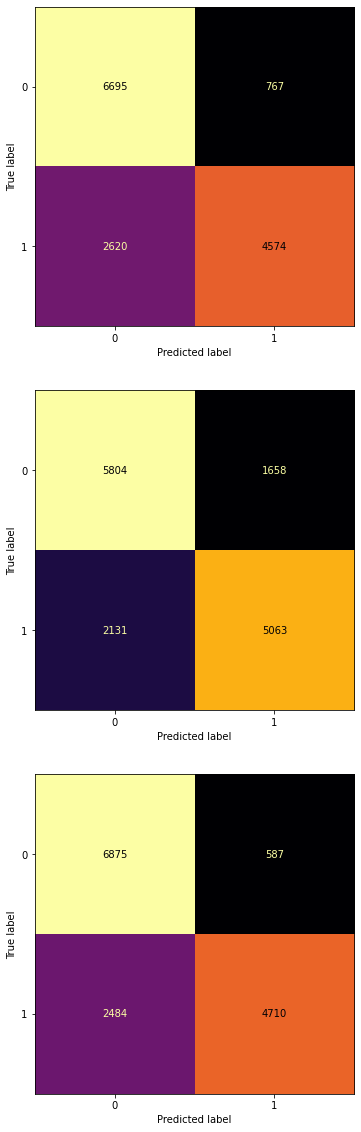

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

fig, axs = plt.subplots(3,1, figsize=(20,20))
plot_confusion_matrix(classifier_rf, X_test, y_test, colorbar=False, cmap='inferno', ax=axs[0])
plot_confusion_matrix(improve_rf, X_test2, y_test2, colorbar=False, cmap='inferno', ax=axs[1])
plot_confusion_matrix(rf_best, X_test, y_test, colorbar=False, cmap='inferno', ax=axs[2])
plt.show()

Menambahkan feature `loan_purpose` ternyata tidak menambahkan akurasi model, model awal lebih baik daripada model setelah ditambahkan feature `loan_purpose`. Hyperparameter tuning meningkatkan akurasi model sebesar 2.15%. Model setelah hyperparameter tuning memiliki nilai presisi 88% dan recall 65%.

### Kesimpulan
- Classification model yang kami gunakan pada model ini menggunakan metode random forest dengan akurasi 76.89%. Kami melakukan penambahan feature dan hyperparameter tuning untuk melakukan improvement terhadap model awal, diperoleh akurasi model akhir adalah 79.04% dengan hyperparamerter tuning. Masalah imbalanced problem sudah kami atasi dengan resample dataset sehingga data yang digunakan untuk train dan test model seimbang.
- Feature-feature penting yang memengaruhi disetujui atau tidaknya suatu permohonan pinjaman adalah `loan_type`, `loan_amount`, `term`, `property_value`, `income`, `Credit_Score`, `age`, dan `dtir1`. 
- Nasabah dengan property value dan income yang tinggi juga ternyata banyak yang default. Hal ini karena loan amount-nya juga tinggi.
- Peminjam dengan usia < 55 tahun lebih banyak yang tidak default dibandingkan dengan peminjam usia >=55 tahun. Hal ini bisa saja disebabkan karena peminjam dengan usia >=55 tahun sudah pensiun.
- Credit score yang tinggi tidak menjamin nasabah akan bisa membayar.
Saran kami untuk perusahaan pinjaman yaitu untuk tidak hanya memperhatikan Credit_Score saja, namun juga faktor lain yang berpengaruh seperti `term`, `loan_amount`,`loan_type`, `property_value`, `income`, `age`, dan juga `dtir1`.
